In [1]:
# Install necessary libraries
!pip install pandas scikit-learn nltk

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('punkt')

# Step 2: Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'text'])

# Step 3: Prepare the data
X = df['text']
y = df['label']

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Text vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# STEP 1: Vectorize your email messages
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['text'])  # 'text' column should contain the emails

# STEP 2: Prepare labels
y = df['label']  # 'label' column should contain spam/ham or new classes

# STEP 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Train Models
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

# STEP 5: Evaluate
for model in [rf, svm]:
    y_pred = model.predict(X_test)
    print(f"Results for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))


Results for RandomForestClassifier:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.90      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Results for SVC:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [6]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
nltk.download('omw-1.4')  # WordNet data


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['cleaned_text'] = df['text'].apply(lemmatize_text)

# TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])


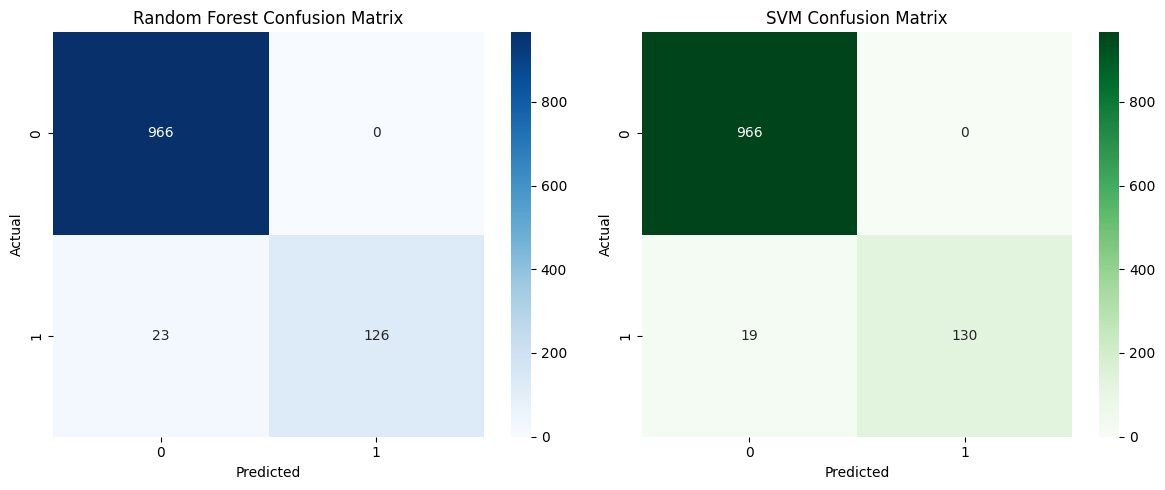

Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

SVM Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=["label", "text"])

# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

rf.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)
svc_preds = svc.predict(X_test)

# Confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svc_cm = confusion_matrix(y_test, svc_preds)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Print classification reports
print("Random Forest Report:\n", classification_report(y_test, rf_preds))
print("SVM Report:\n", classification_report(y_test, svc_preds))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Paste your email message here:
Reply now to claim your FREE reward! Offer ends today!

Predicted Spam Risk: 68.0%


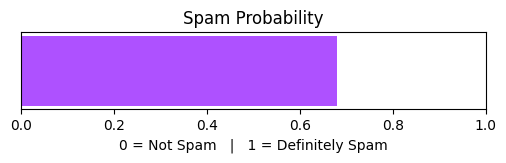

In [14]:
# STEP 1: Install & import everything
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

nltk.download('wordnet')

# STEP 2: Load data
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", header=None, names=['label', 'text'])

# STEP 3: Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# STEP 4: Preprocessing function
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['cleaned_text'] = df['text'].apply(lemmatize_text)

# STEP 5: TF-IDF vectorizer + model
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# STEP 6: Live Prediction
email_input = input("Paste your email message here:\n")
processed_input = lemmatize_text(email_input)
input_vector = vectorizer.transform([processed_input])
proba = rf_model.predict_proba(input_vector)[0][1]

# Output + Gradient Bar
print(f"\nPredicted Spam Risk: {round(proba * 100, 2)}%")

plt.figure(figsize=(6,1))
plt.barh([0], [proba], color=plt.cm.cool(proba))
plt.xlim(0, 1)
plt.title('Spam Probability')
plt.xlabel('0 = Not Spam   |   1 = Definitely Spam')
plt.yticks([])
plt.show()
